In [ ]:
        # Classification d'images avec un CNN - Devoir de l'etudiant mouhcine riany

In [ ]:
# Ce notebook présente la classification d'images du dataset CIFAR10 en deux catégories : "peut voler" et "ne peut pas voler".

In [ ]:
## 1. Charger et préparer les données CIFAR10

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
can_fly_classes = [0, 2]  # avion, oiseau
cannot_fly_classes = [1, 3, 4, 5, 6, 7, 8, 9]  # autres classes

# Filtrer les données pour la classification binaire
def filter_classes(x, y, classes):
    mask = np.isin(y, classes).flatten()
    return x[mask], y[mask]

x_train, y_train = filter_classes(x_train, y_train, can_fly_classes + cannot_fly_classes)
x_test, y_test = filter_classes(x_test, y_test, can_fly_classes + cannot_fly_classes)
y_train = np.where(np.isin(y_train, can_fly_classes), 1, 0)
y_test = np.where(np.isin(y_test, can_fly_classes), 1, 0)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
# Construire le modèle CNN et compiler le model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrainer le model

In [3]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7806 - loss: 2.8359 - val_accuracy: 0.8265 - val_loss: 0.4059
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8198 - loss: 0.4258 - val_accuracy: 0.8323 - val_loss: 0.4034
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8289 - loss: 0.3984 - val_accuracy: 0.8467 - val_loss: 0.3861
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8440 - loss: 0.3750 - val_accuracy: 0.8358 - val_loss: 0.4077
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8489 - loss: 0.3612 - val_accuracy: 0.8526 - val_loss: 0.3486
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8549 - loss: 0.3452 - val_accuracy: 0.8671 - val_loss: 0.3283
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8618 - loss: 0.3336 - val_accuracy: 0.8663 - val_loss: 0.3371
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8642 - loss: 0.3265 - 

In [ ]:
# Evaluer le model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Précision: 0.8084596967278531
Rappel: 0.5065
F1 Score: 0.6228097141100521
Exactitude: 0.8773


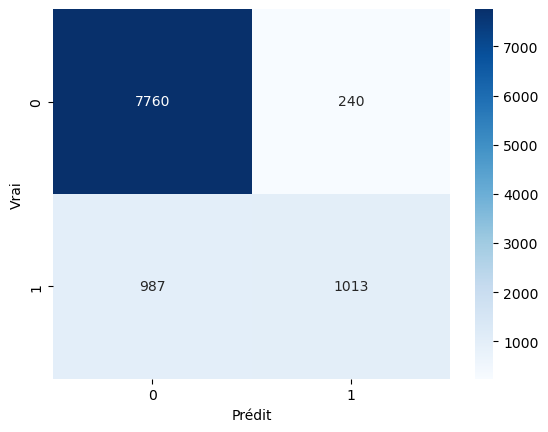

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Précision: {precision}')
print(f'Rappel: {recall}')
print(f'F1 Score: {f1}')
print(f'Exactitude: {accuracy}')
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()
